<a href="https://colab.research.google.com/github/jnsbrdbr/machine_learning_pojects/blob/project/micrubs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

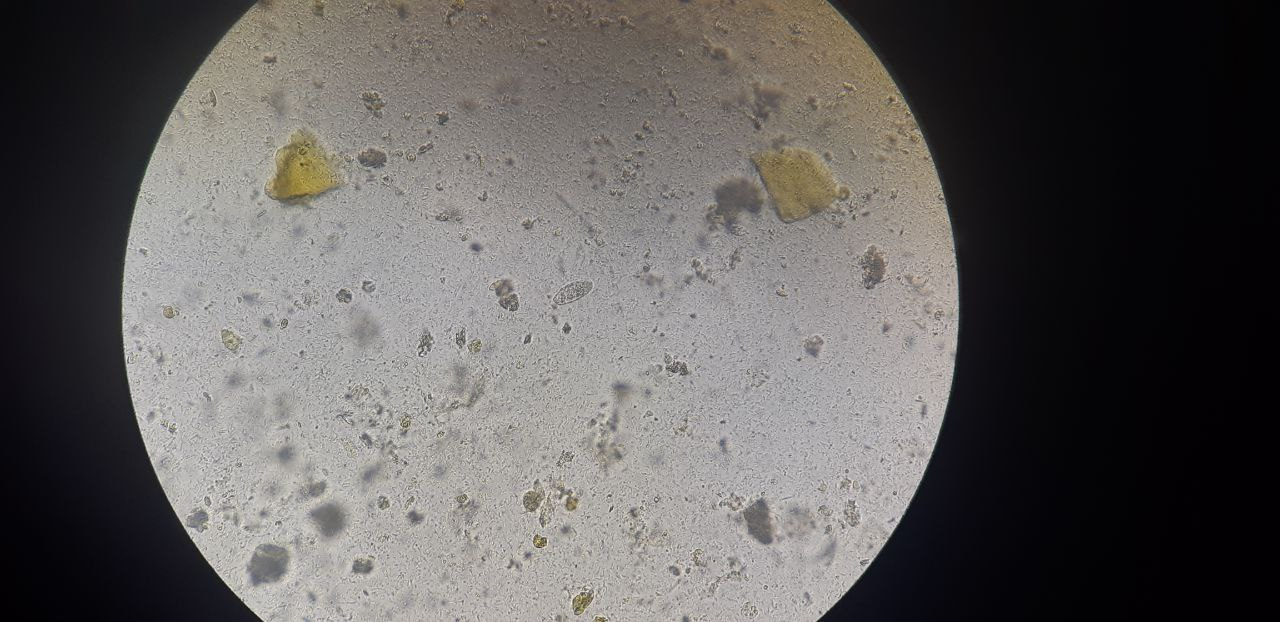

In [ ]:
image_path = '/content/drive/MyDrive/1.jpg'
image = cv2.imread(image_path)
cv2_imshow(image)

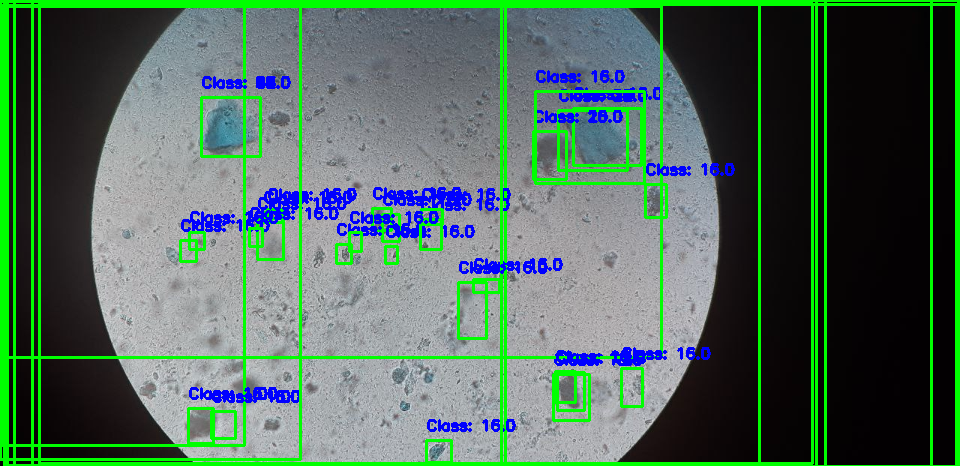

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from google.colab.patches import cv2_imshow  # Use this for image display in Colab

# Load the EfficientDet model from TensorFlow Hub
model = hub.load('https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2')

# Load the image
image_path = '/content/drive/MyDrive/1.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert the image to a tensor
image = cv2.resize(image, (None, None), fx=0.75, fy=0.75)  # Resize the image
image = tf.image.convert_image_dtype(image, dtype=tf.uint8)
image_tensor = tf.convert_to_tensor([image])

# Make predictions
detections = model(image_tensor)
# Extract information from detections
boxes = detections['detection_boxes'][0].numpy()
classes = detections['detection_classes'][0].numpy()
scores = detections['detection_scores'][0].numpy()

# Set a threshold for detection confidence
threshold = 0.05
filtered_boxes = boxes[scores > threshold]
filtered_classes = classes[scores > threshold]

# Convert EagerTensor to NumPy array before drawing bounding boxes
image = np.array(image)  # Convert back to NumPy array

# Draw bounding boxes on the image
for box, obj_class in zip(filtered_boxes, filtered_classes):
    ymin, xmin, ymax, xmax = box
    ymin, xmin, ymax, xmax = int(ymin * image.shape[0]), int(xmin * image.shape[1]), \
                             int(ymax * image.shape[0]), int(xmax * image.shape[1])
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)
    cv2.putText(image, f'Class: {obj_class}', (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

# Display the result using cv2_imshow for Colab
cv2_imshow(image)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
